In [233]:
import pandas as pd 
import numpy as np

In [234]:
df_final = pd.read_csv("C:/Users/HP/Desktop/datathon/App/final_data.csv")
df_final

,Date,MaxTemp,MinTemp,TOTALDEMAND,RRP,DAILYT
0,2018-01-01,24.866667,16.500000,3988.814894,71.063404,6.149738e+06
1,2018-01-02,22.533333,16.250000,4581.217083,71.768750,6.381157e+06
2,2018-01-03,21.433333,14.033333,4889.427500,77.660000,6.219129e+06
3,2018-01-04,23.300000,12.833333,4117.376250,73.070833,6.730797e+06
4,2018-01-05,31.000000,13.433333,5110.093125,72.521667,7.976139e+06
...,...,...,...,...,...,...
816,2020-03-27,27.700000,12.433333,4664.926875,48.927500,6.698559e+06
817,2020-03-28,27.966667,13.433333,4080.154792,46.997083,6.587342e+06
818,2020-03-29,26.966667,18.066667,3998.050208,41.331250,7.075753e+06
819,2020-03-30,21.833333,15.366667,4486.979583,56.481875,6.653502e+06


In [235]:
df_final['Date'] = pd.to_datetime(df_final['Date'])

In [236]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         821 non-null    datetime64[ns]
 1   MaxTemp      821 non-null    float64       
 2   MinTemp      821 non-null    float64       
 3   TOTALDEMAND  821 non-null    float64       
 4   RRP          821 non-null    float64       
 5   DAILYT       821 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 38.6 KB


In [237]:
df_final.set_index(['Date'], inplace=True)

df_final.head()

,MaxTemp,MinTemp,TOTALDEMAND,RRP,DAILYT
Date,,,,,
2018-01-01,24.866667,16.500000,3988.814894,71.063404,6.149738e+06
2018-01-02,22.533333,16.250000,4581.217083,71.768750,6.381157e+06
2018-01-03,21.433333,14.033333,4889.427500,77.660000,6.219129e+06
2018-01-04,23.300000,12.833333,4117.376250,73.070833,6.730797e+06
2018-01-05,31.000000,13.433333,5110.093125,72.521667,7.976139e+06


In [238]:
#Neural Network
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [239]:
scaler = MinMaxScaler()
data_normal = scaler.fit_transform(df_final)

In [240]:
features = data_normal
target = data_normal[:,0]

In [241]:
TimeseriesGenerator(features, target, length=50, sampling_rate=1, batch_size=1)

In [242]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, shuffle=False)

In [243]:
win_length=30
batch_size=32
num_features = 5
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [244]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length,num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [245]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 30, 128)           68608     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 30, 128)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 30, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)               

In [246]:
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=150, validation_data=test_generator, shuffle=False)

] - 2s 78ms/step - loss: 0.0156 - mean_absolute_error: 0.0942 - val_loss: 0.0320 - val_mean_absolute_error: 0.1445
Epoch 31/150
20/20 [==============================] - 1s 70ms/step - loss: 0.0163 - mean_absolute_error: 0.0948 - val_loss: 0.0327 - val_mean_absolute_error: 0.1477
Epoch 32/150
20/20 [==============================] - 1s 73ms/step - loss: 0.0165 - mean_absolute_error: 0.0961 - val_loss: 0.0322 - val_mean_absolute_error: 0.1448
Epoch 33/150
20/20 [==============================] - 2s 87ms/step - loss: 0.0161 - mean_absolute_error: 0.0958 - val_loss: 0.0319 - val_mean_absolute_error: 0.1431
Epoch 34/150
20/20 [==============================] - 1s 75ms/step - loss: 0.0154 - mean_absolute_error: 0.0931 - val_loss: 0.0330 - val_mean_absolute_error: 0.1484
Epoch 35/150
20/20 [==============================] - 1s 75ms/step - loss: 0.0171 - mean_absolute_error: 0.0965 - val_loss: 0.0354 - val_mean_absolute_error: 0.1590
Epoch 36/150
20/20 [==============================] - 1s 70m

In [247]:
from keras.models import load_model


In [248]:
model.save('model.h5')

In [249]:
model.evaluate_generator(test_generator, verbose=0)

[0.034380290657281876, 0.14845804870128632]

In [250]:
predictions = model.predict_generator(test_generator)

In [251]:
# x_test[:,1:][win_length:]

In [252]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [253]:
rev_trans = scaler.inverse_transform(df_pred)

In [254]:
# rev_trans

In [255]:
df_new=df_final[predictions.shape[0]*-1:]

In [256]:
df_new['Energy_pred'] = rev_trans[:,0]

In [257]:
df_new.columns

Index(['MaxTemp', 'MinTemp', 'TOTALDEMAND', 'RRP', 'DAILYT', 'Energy_pred'], dtype='object')

In [258]:

df_new['TOTALDEMAND'] = df_new.round(2)
df_new

,MaxTemp,MinTemp,TOTALDEMAND,RRP,DAILYT,Energy_pred
Date,,,,,,
2019-11-18,26.600000,7.666667,26.60,71.136042,6.234940e+06,21.156991
2019-11-19,18.533333,9.866667,18.53,81.539583,6.186595e+06,27.111471
2019-11-20,34.566667,8.550000,34.57,81.728542,7.290828e+06,21.661121
2019-11-21,41.333333,14.750000,41.33,69.803542,9.236367e+06,31.013093
2019-11-22,19.700000,12.300000,19.70,64.691042,5.880641e+06,26.411423
...,...,...,...,...,...,...
2020-03-27,27.700000,12.433333,27.70,48.927500,6.698559e+06,22.215101
2020-03-28,27.966667,13.433333,27.97,46.997083,6.587342e+06,23.714676
2020-03-29,26.966667,18.066667,26.97,41.331250,7.075753e+06,22.670021


<AxesSubplot:xlabel='Date'>

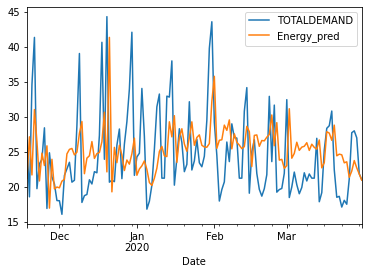

In [259]:
df_new[['TOTALDEMAND','Energy_pred']].plot()